In [6]:
from fastapi.testclient import TestClient
import os
import sys


# sys.path에 현재 디렉토리 추가
sys.path.append("..")

from app.main import app

# 테스트 클라이언트 생성
client = TestClient(app)


In [23]:
# load image from file and send to the detect_image endpoint
with open("plastic.jpg", "rb") as image_file:
    
    response = client.post("/detect", files={"image": ("plastic.jpg", image_file, "image/jpeg")})

print(response.status_code)
print(response.json())


INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
INFO:httpx:HTTP Request: POST http://testserver/detect "HTTP/1.1 200 OK"


200
{'success': True, 'objects': [{'label': 'plastic waste', 'confidence': 0.95, 'description': 'clean', 'box_2d': [27.0, 21.0, 449.0, 517.0]}, {'label': 'plastic waste', 'confidence': 0.85, 'description': 'dirty', 'box_2d': [259.0, 463.0, 696.0, 889.0]}], 'total_objects': 2}


Detected objects:
 - plastic waste (confidence: 0.95, description : clean)
 - plastic waste (confidence: 0.85, description : dirty)


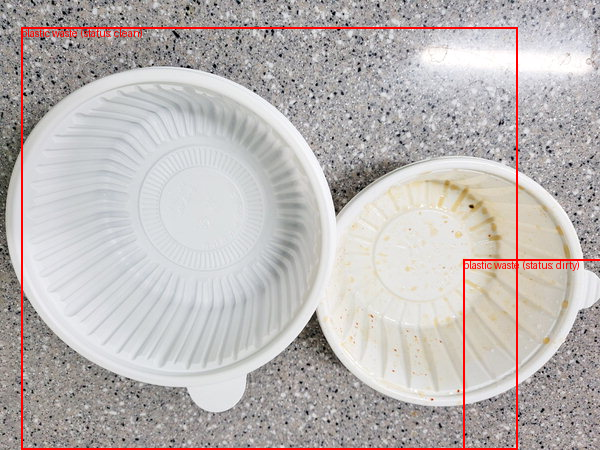

In [ ]:
objects = response.json().get("objects", [])
if len(objects) > 0:
    print("Detected objects:")
    for obj in objects:
        print(f" - {obj['label']} (confidence: {obj['confidence']:.2f}, description : {obj['description']})")


# show image with bounding boxes
from PIL import Image, ImageDraw

# Load the image
image = Image.open("plastic.jpg")
draw = ImageDraw.Draw(image)
for obj in objects:
    box = obj["box_2d"]
    ymin, xmin, ymax, xmax = box
    draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)
    draw.text((xmin, ymin), f"{obj['label']} (status: {obj['description']})", fill="red")

# show the image with bounding boxes on notebook
image